In [1]:
import scvelo as scv
import matplotlib
import matplotlib.pyplot as plt
scv.logging.print_version()

/usr/local/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Running scvelo 0.2.3 (python 3.6.8) on 2021-10-20 14:39.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.read("epi_velocity.h5ad", cache=True)
adata

AnnData object with n_obs × n_vars = 10065 × 33514
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nGene', 'nUMI', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'integrated_snn_res.0.8', 'cluster', 'sampleID', 'sample', 'group', 'finalcluster', 'refcluster', 'majorcluster', 'majorID', 'clusterlabel', 'DEgenes', 'integrated_snn_res.0.25', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [9]:
adata.obs['cluster'].cat.categories

Index(['0', '1', '2', '3', '4', '5'], dtype='object')

In [10]:
ident_colours = ["#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02"]
adata.uns['cluster_colors']=ident_colours
adata.uns['cluster_colors']

['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02']

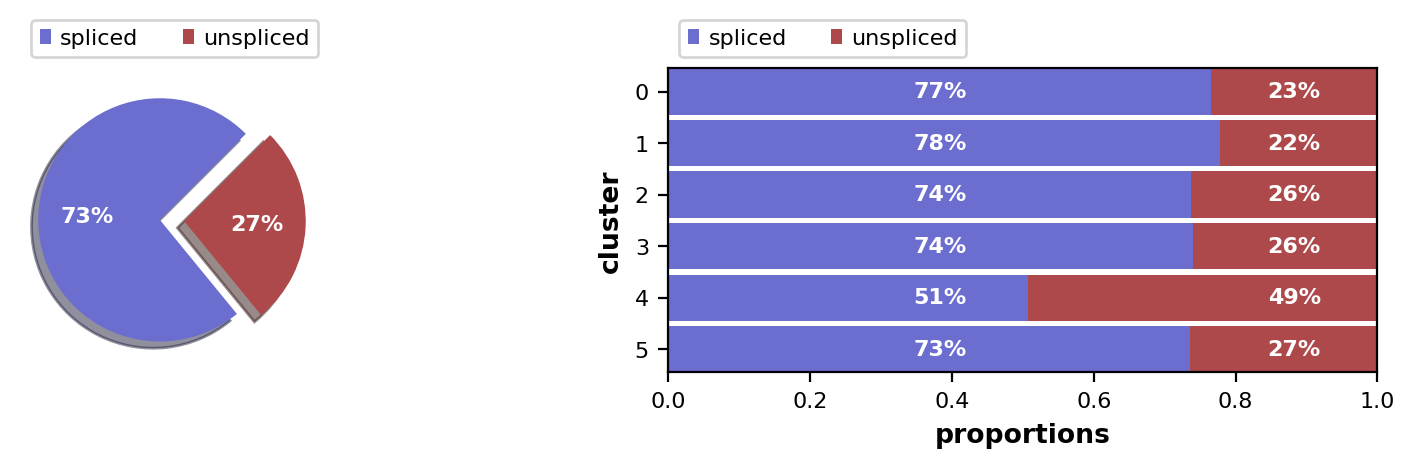

<Figure size 600x400 with 0 Axes>

In [11]:
scv.pl.proportions(adata, groupby='cluster')
plt.savefig("Figure6-velocity_proportions.pdf")

In [12]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

Filtered out 172 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:22) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_Figure6-velocity_embedding_stream.svg


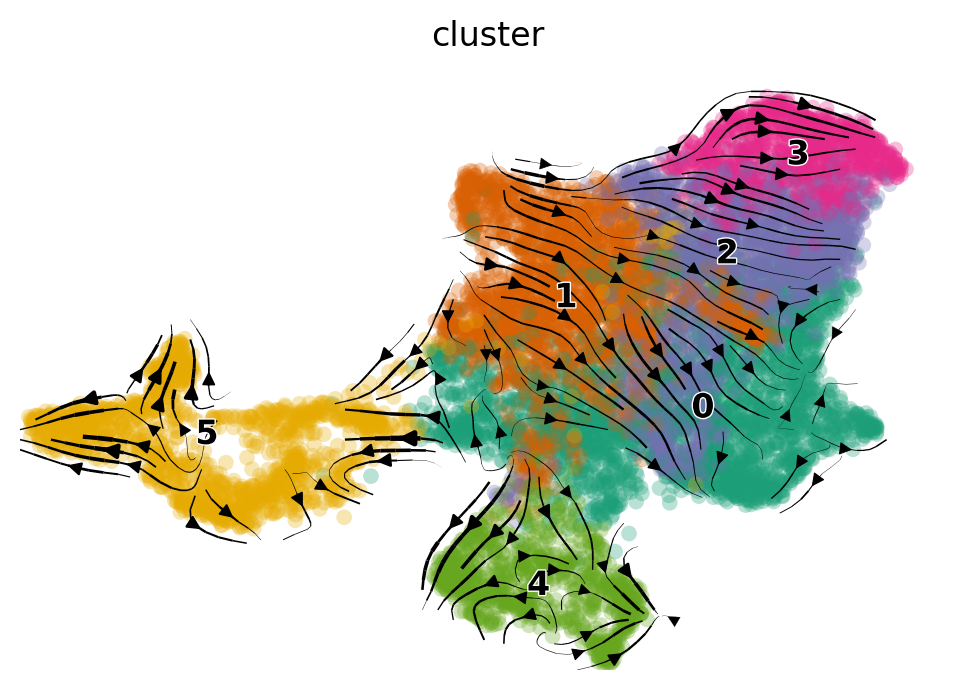

In [13]:
# plt.figure(figsize=(10,10))
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cluster", 
                                 save="Figure6-velocity_embedding_stream.svg")

saving figure to file ./figures/scvelo_Figure6-scvelo_embedding_arrow.pdf


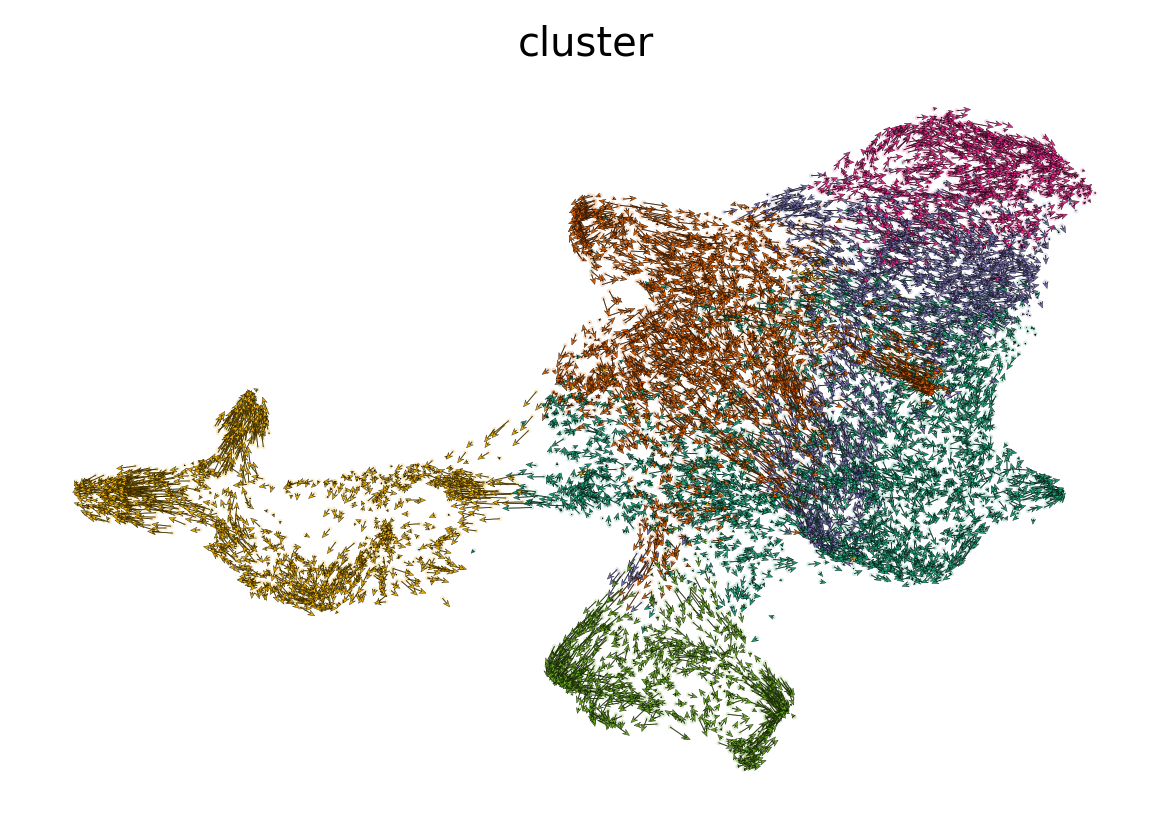

In [14]:
scv.pl.velocity_embedding(adata, basis="umap", color="cluster",
                          arrow_length=5, arrow_size=1, dpi=120,
                          save="Figure6-scvelo_embedding_arrow.pdf")

saving figure to file ./figures/scvelo_Figure6-scvelo_embedding.pdf


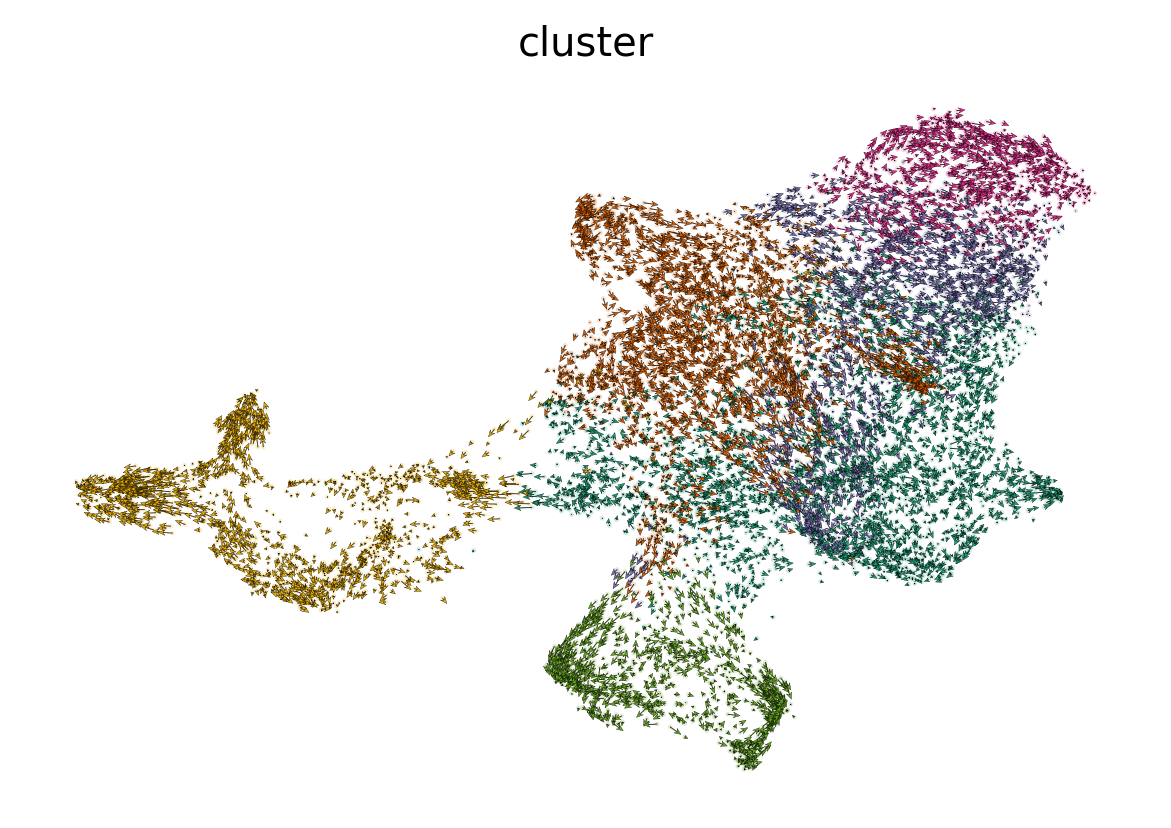

In [15]:
scv.pl.velocity_embedding(adata, basis="umap", color="cluster", 
                          arrow_length=3, arrow_size=1, dpi=120, 
                          save="Figure6-scvelo_embedding.pdf") ## 

saving figure to file ./figures/scvelo_Figure6-velocity_embedding_grid.pdf


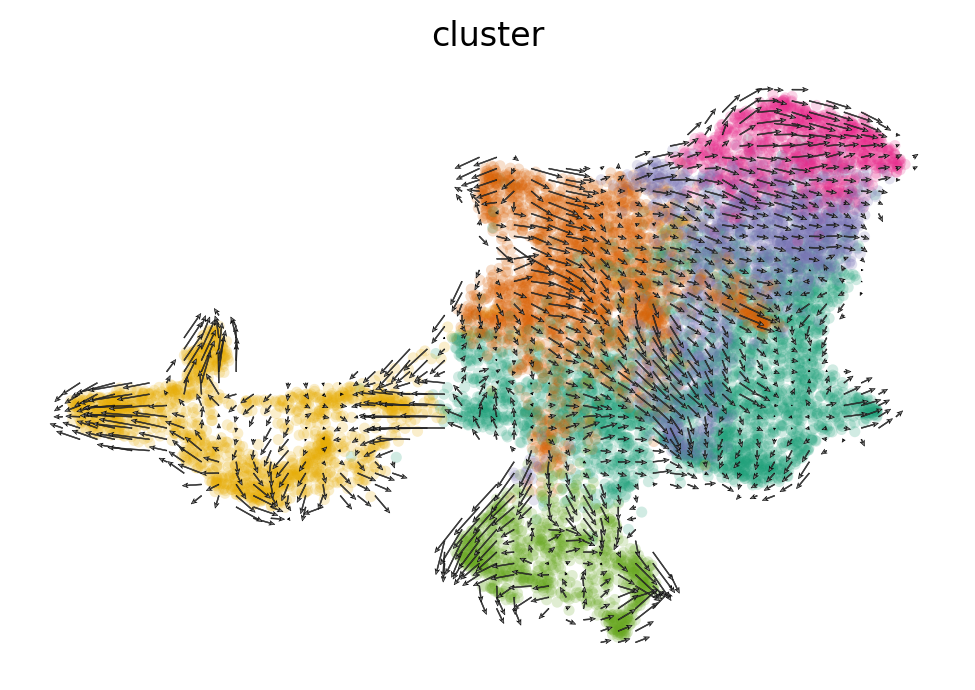

In [16]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color="cluster", arrow_length=3, arrow_size=1,
                               save="Figure6-velocity_embedding_grid.pdf")

In [17]:
scv.tl.recover_dynamics(adata, n_jobs=20)
scv.tl.latent_time(adata)

recovering dynamics (using 20/160 cores)



    finished (0:01:07) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 6 regions of root cells and 2 regions of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


saving figure to file ./figures/scvelo_Figure6-scvelo_scatter.pdf


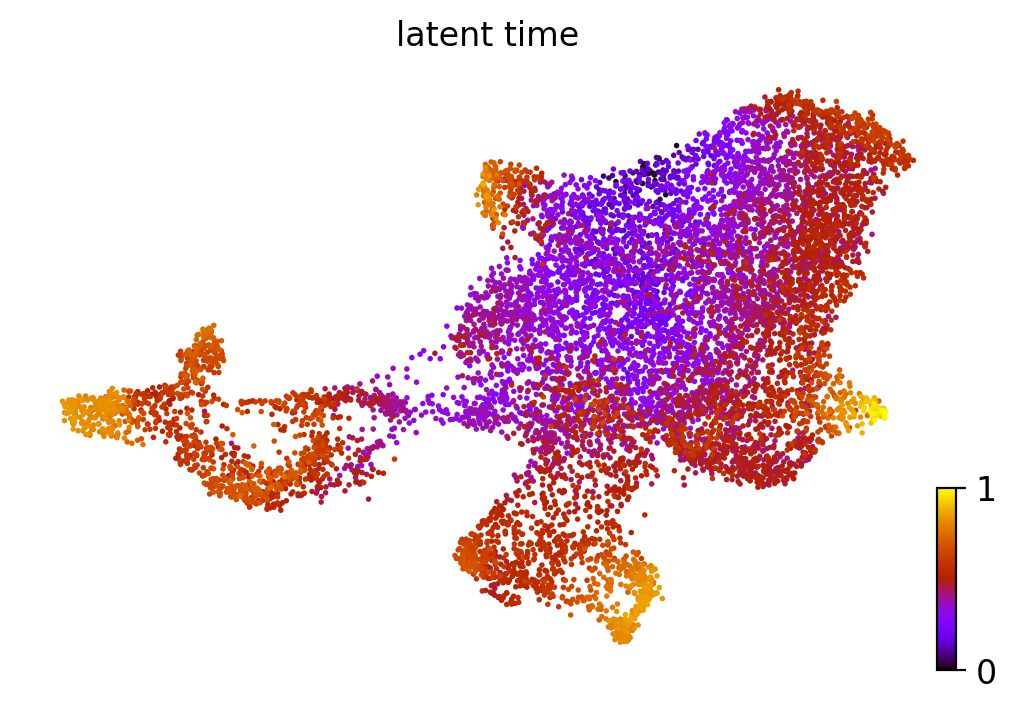

In [18]:
scv.pl.scatter(adata, color="latent_time", color_map="gnuplot", 
               save="Figure6-scvelo_scatter.pdf")

saving figure to file ./figures/scvelo_heatmap_scvelo_heatmap.png


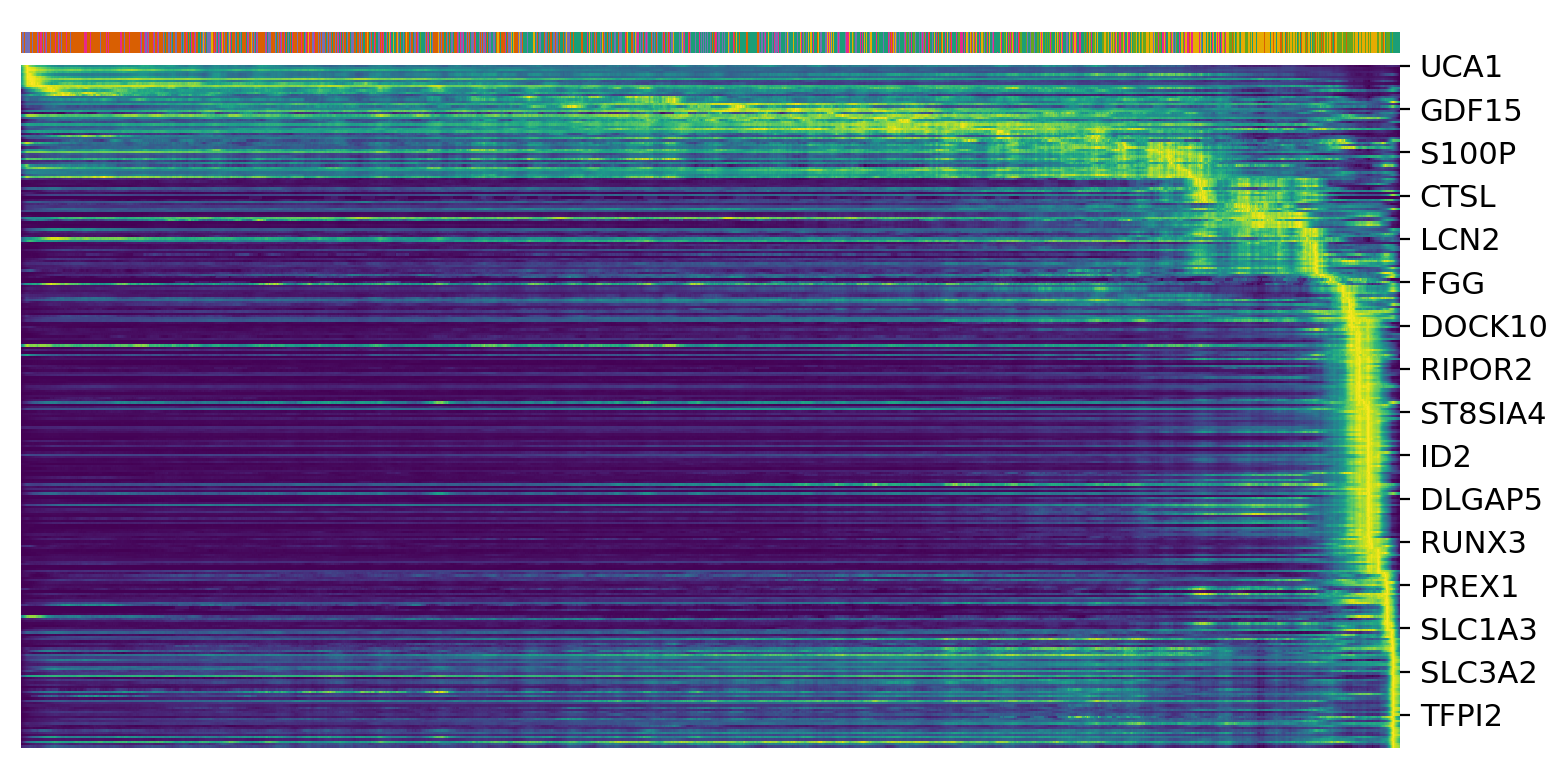

In [19]:
top_genes = adata.var["fit_likelihood"].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby="latent_time", 
               col_color="cluster", n_convolve=100, save="scvelo_heatmap.png")

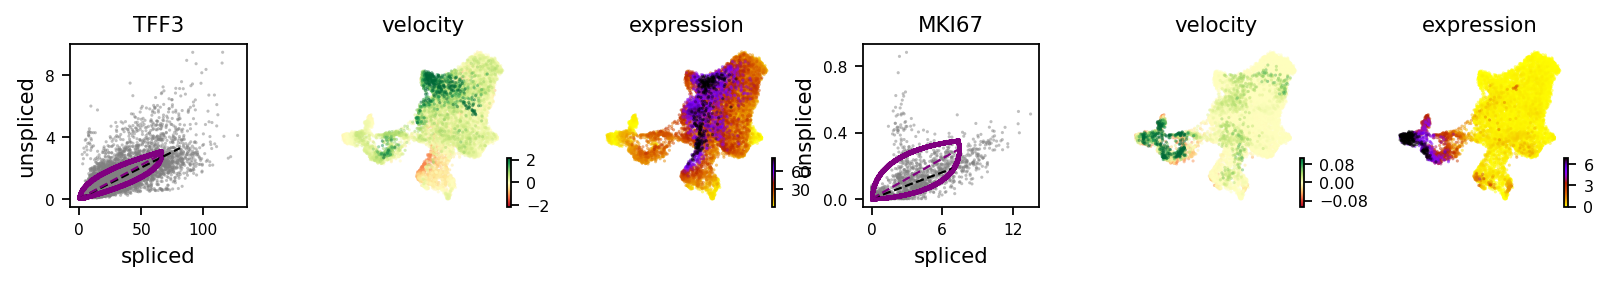

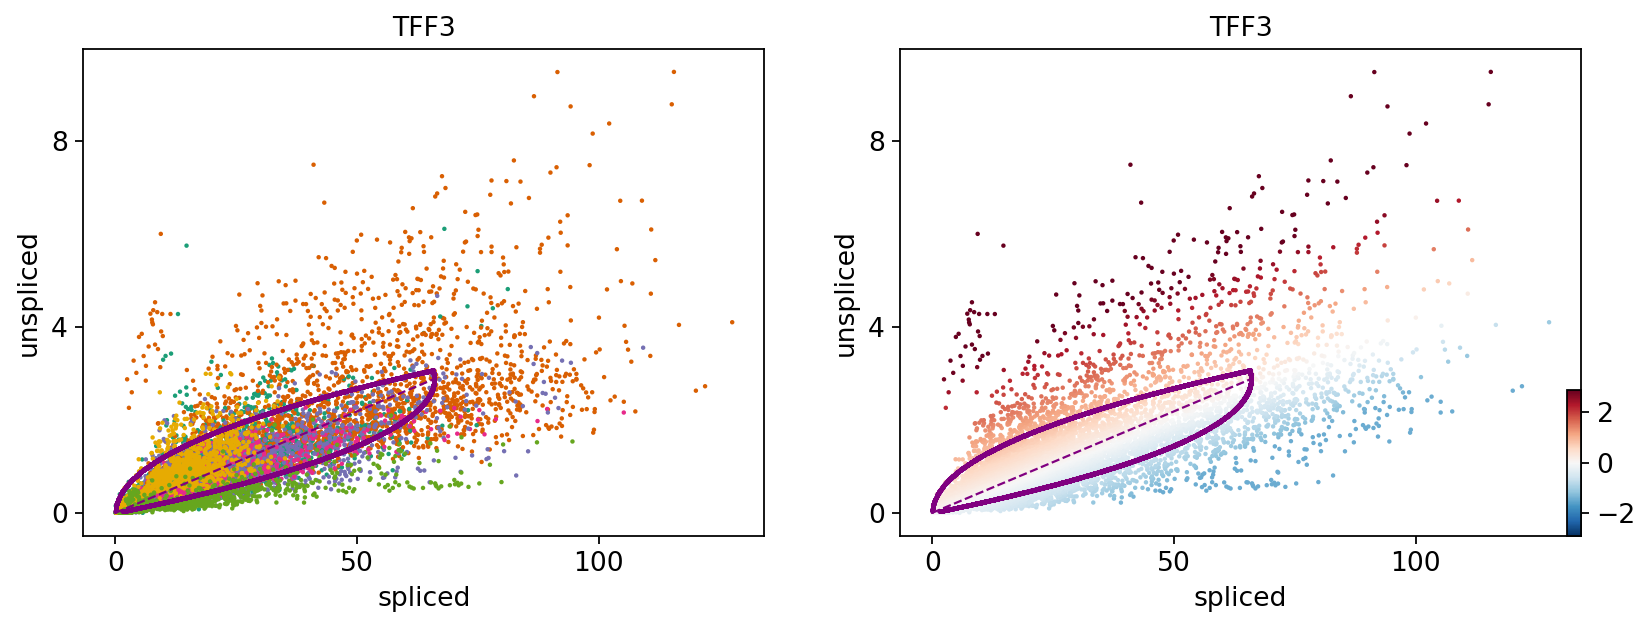

In [20]:
scv.pl.velocity(adata, ['TFF3', 'MKI67'], ncols=2)
scv.pl.scatter(adata, 'TFF3', color=['cluster', 'velocity'])

saving figure to file ./figures/scvelo_Figure6-velocity_graph.pdf


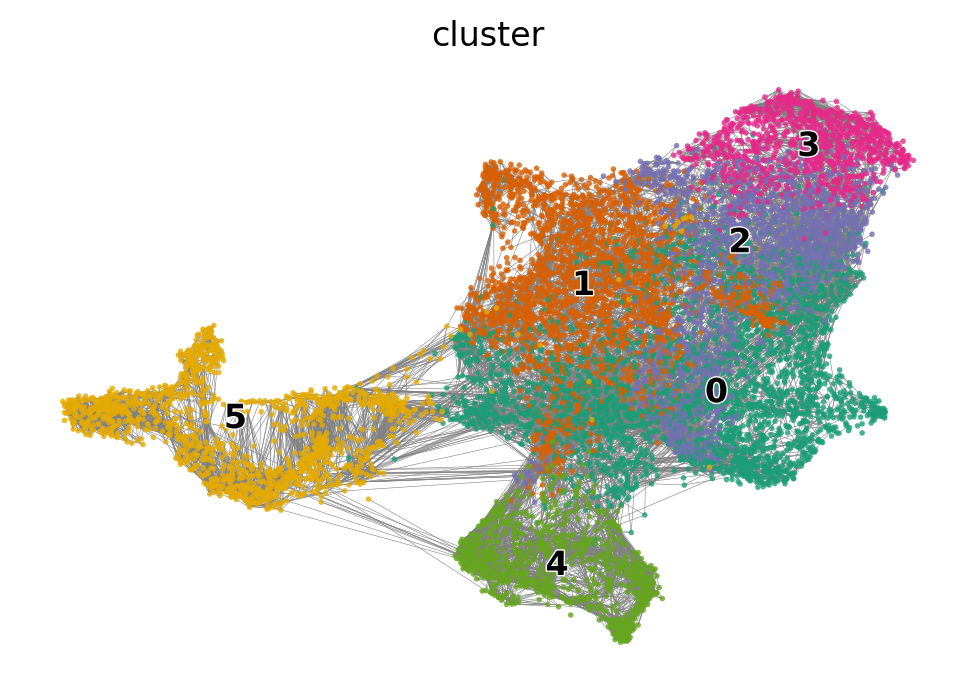

In [21]:
scv.pl.velocity_graph(adata, threshold=.1,color='cluster',
                     save="Figure6-velocity_graph.pdf")

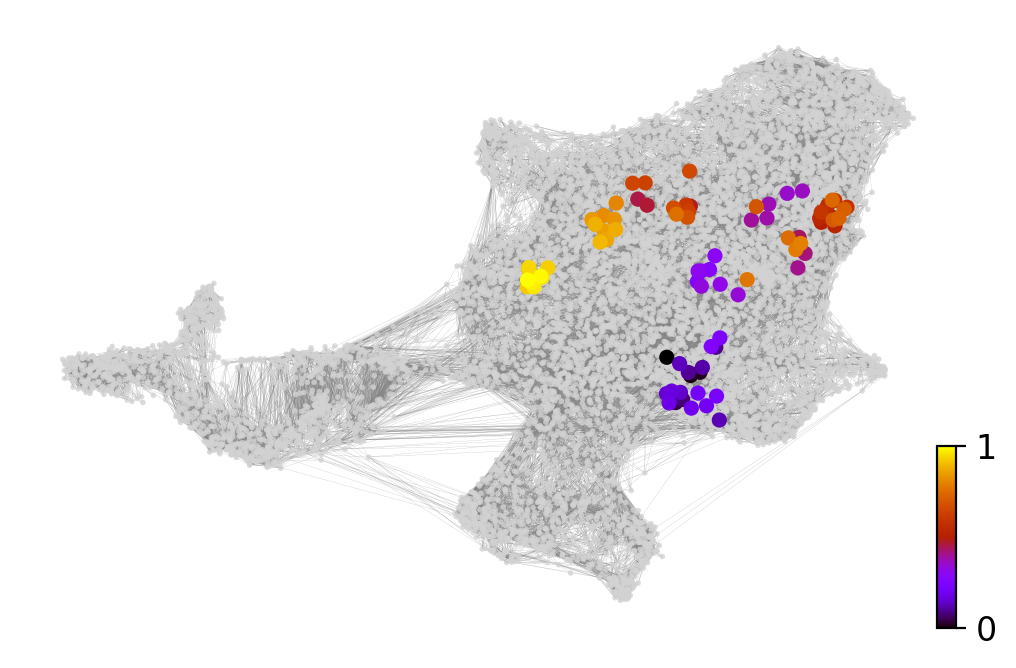

In [22]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

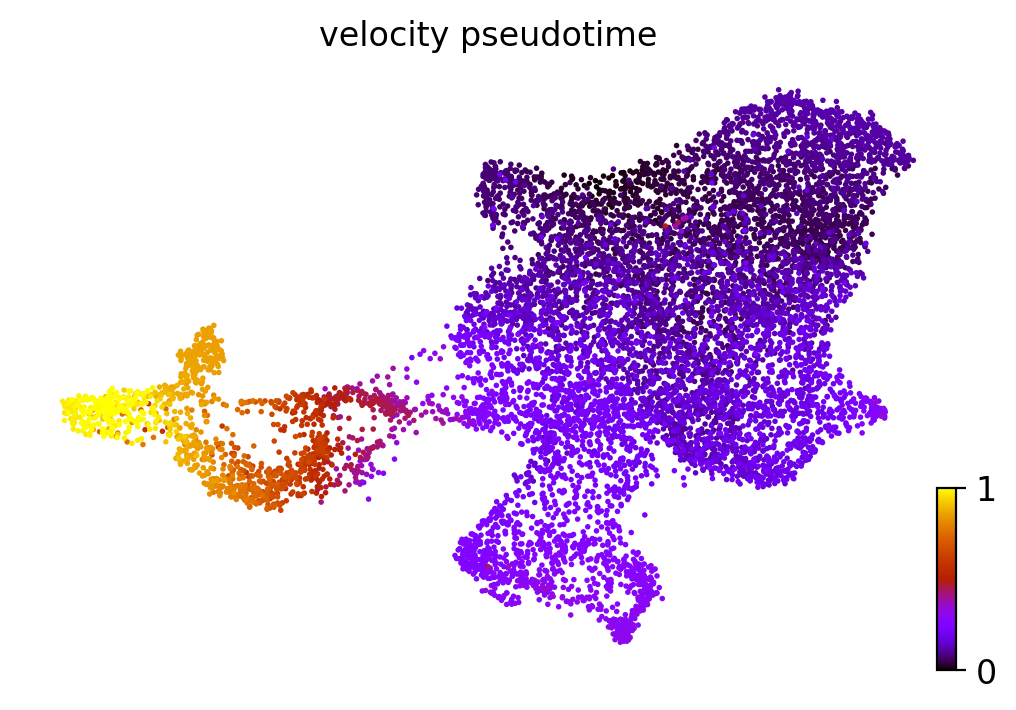

In [23]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [25]:
adata.write('epi_velocity2.h5ad', compression='gzip')